<a href="https://colab.research.google.com/github/seyed-mohammadreza-mousavi/ml-playground-starter/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🧠 K-Nearest Neighbors (KNN) from Scratch

This notebook demonstrates **K-Nearest Neighbors (KNN)** — one of the simplest yet powerful non-parametric algorithms in machine learning.  
We’ll go through:

1. Mathematical intuition  
2. Implementation from scratch using NumPy  
3. Visualization on synthetic data  
4. Comparison with scikit-learn implementation



## 📘 1. Mathematical Intuition

The **KNN algorithm** classifies a new sample based on the majority label of its **K nearest points** in the feature space.

### Formula for Distance
For two points $x_i$ and $x_j$ in a $d$-dimensional space:

$$
d(x_i, x_j) = \sqrt{\sum_{k=1}^{d} (x_{ik} - x_{jk})^2}
$$

### Decision Rule
For a query point $x_q$:
1. Compute distances to all training samples.
2. Select the **K smallest distances**.
3. Assign the label with the majority vote among those K neighbors.

KNN can also be used for regression (average of K neighbors).


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Ensure reproducibility
np.random.seed(42)



## ⚙️ 2. Implementation from Scratch


In [2]:

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        # Get K nearest labels
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indices]
        # Majority vote
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]



## 🧩 3. Generate and Visualize Data
We'll create a 2D dataset to visualize decision boundaries easily.


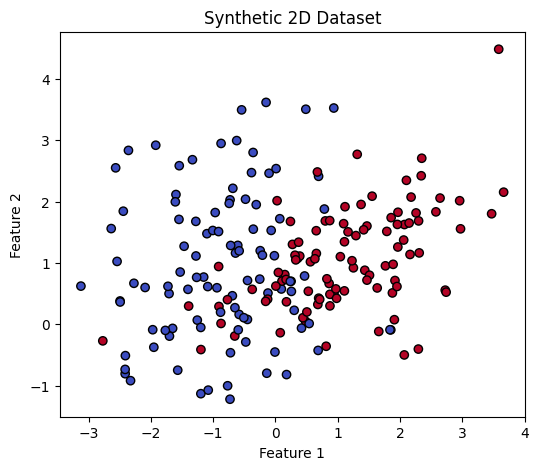

In [3]:

X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Synthetic 2D Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



## 🔍 4. Train and Evaluate Our KNN


In [4]:

knn = KNN(k=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy (Scratch KNN): {acc:.3f}")


Accuracy (Scratch KNN): 0.875



## 🎨 5. Visualize Decision Boundaries


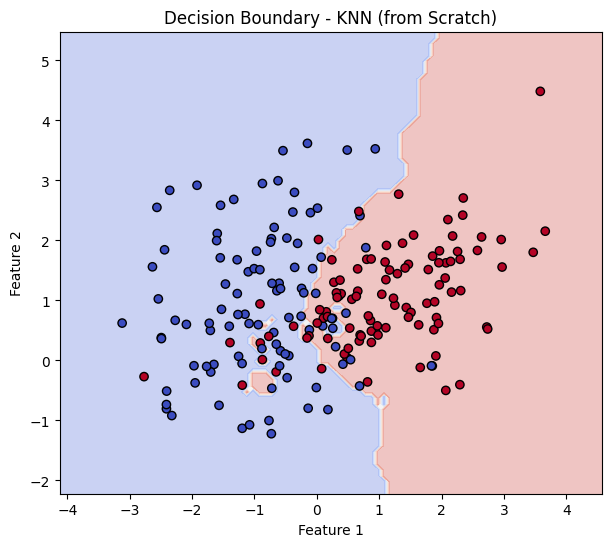

In [5]:

def plot_decision_boundary(model, X, y, title="Decision Boundary (KNN)"):
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(knn, X, y, title="Decision Boundary - KNN (from Scratch)")



## 🧮 6. Compare with scikit-learn Implementation


Accuracy (scikit-learn KNN): 0.875


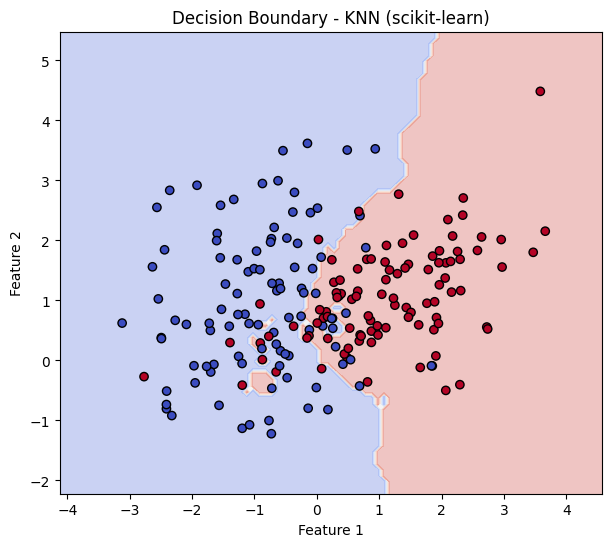

In [6]:

sk_knn = KNeighborsClassifier(n_neighbors=5)
sk_knn.fit(X_train, y_train)
y_pred_lib = sk_knn.predict(X_test)

print(f"Accuracy (scikit-learn KNN): {accuracy_score(y_test, y_pred_lib):.3f}")
plot_decision_boundary(sk_knn, X, y, title="Decision Boundary - KNN (scikit-learn)")



## ✅ Summary

- KNN is a **non-parametric**, **instance-based** learning algorithm.
- It uses **distance metrics** to classify new points.
- Works well for **low-dimensional data**, but scales poorly with large datasets.
- No training phase (lazy learning), but prediction is **computationally expensive**.

---

**You learned:**
- The math behind KNN  
- Implementation from scratch  
- Visualization of decision boundaries  
- Comparison with scikit-learn’s version

> Continue to next project → **Naive Bayes Classifier**
